In [107]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split , cross_val_score, GridSearchCV, StratifiedKFold
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Import metrics
from sklearn import metrics

# Import Pipeline
from sklearn.pipeline import Pipeline

# Import pre[rocessing transformer
from sklearn.preprocessing import StandardScaler



# Import models


from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
# Import models

from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [42]:
df = pd.read_csv('../data/clean_data_dates_dummies.csv')

In [43]:
df.head()

,protestnumber,protesterviolence,participants,notes,stateresponse,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",...,year_2017,year_2018,year_2019,region_Asia,region_Central America,region_Europe,region_MENA,region_North America,region_Oceania,region_South America
0,1,0.0,3000,Canada s railway passenger system was finally...,ignore,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0.0,1000,protestors were only identified as young peop...,ignore,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,0.0,500,"THE Queen, after calling on Canadians to rema...",ignore,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1.0,300,Canada s federal government has agreed to acq...,accomodation,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,1.0,950,Protests were directed against the state due t...,arrests,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Sentiment analyzer with VADER 

In [45]:
corpus=list(df['notes'])
len(corpus)

14474

In [46]:
#instantiate SIA
sia=SentimentIntensityAnalyzer()

#Get polarity scores for the first title
sia.polarity_scores(corpus[0])

{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.8176}

In [47]:
dicts = []    

for text in corpus:
    scores = sia.polarity_scores(text)
    scores['text'] = text
    dicts.append(scores)

df_new = pd.DataFrame(dicts)
df_new.head()

,neg,neu,pos,compound,text
0,0.083,0.917,0.000,-0.8176,Canada s railway passenger system was finally...
1,0.000,1.000,0.000,0.0000,protestors were only identified as young peop...
2,0.059,0.833,0.107,0.7003,"THE Queen, after calling on Canadians to rema..."
3,0.132,0.823,0.045,-0.9711,Canada s federal government has agreed to acq...
4,0.226,0.677,0.098,-0.5267,Protests were directed against the state due t...


In [48]:
df_new['protesterviolence']=df['protesterviolence']

In [49]:
df_new['stateresponse']=df['stateresponse']

In [50]:
df_new.sort_values(by='pos', ascending=False).head(10)

,neg,neu,pos,compound,text,protesterviolence,stateresponse
13817,0.0,0.133,0.867,0.7579,free trade agreement,0.0,ignore
7262,0.0,0.192,0.808,0.6369,Press Freedom,0.0,arrests
12910,0.0,0.192,0.808,0.6369,press freedom,0.0,ignore
1287,0.0,0.192,0.808,0.6369,press freedom,0.0,ignore
1289,0.0,0.192,0.808,0.6369,press freedom,0.0,ignore
12556,0.0,0.233,0.767,0.5106,free trade,0.0,crowd dispersal
12547,0.0,0.233,0.767,0.5106,free trade,1.0,crowd dispersal
12562,0.0,0.233,0.767,0.5106,free trade,0.0,ignore
14222,0.0,0.256,0.744,0.4404,supporting bases,0.0,ignore
13866,0.0,0.256,0.744,0.4404,government supporters,0.0,ignore


In [51]:
df_new.sort_values(by='neg', ascending=False).head(10)

,neg,neu,pos,compound,text,protesterviolence,stateresponse
1416,1.0,0.0,0.0,-0.1280,strike,0.0,ignore
2206,1.0,0.0,0.0,-0.1280,strike,0.0,ignore
2209,1.0,0.0,0.0,-0.1280,strike,0.0,ignore
14226,1.0,0.0,0.0,-0.7003,anti crime,0.0,ignore
1876,1.0,0.0,0.0,-0.1280,strike,0.0,ignore
2015,1.0,0.0,0.0,-0.3612,hunger strike,0.0,ignore
2211,1.0,0.0,0.0,-0.1280,strike,0.0,ignore
12458,1.0,0.0,0.0,-0.3612,hunger strike,0.0,ignore
14286,1.0,0.0,0.0,-0.1280,strike,0.0,ignore
1295,1.0,0.0,0.0,-0.3612,hunger strike,0.0,ignore


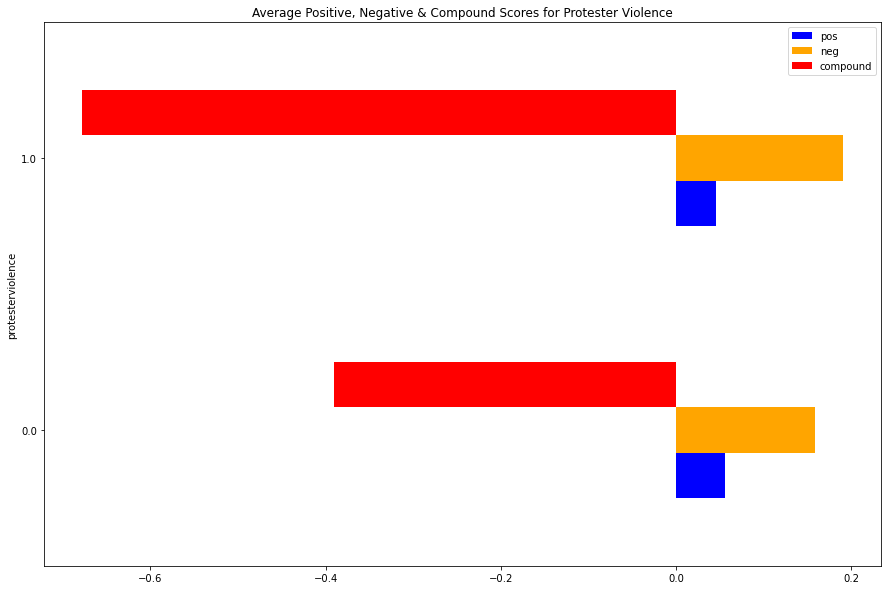

In [100]:
df_new.groupby('protesterviolence').mean()[['pos', 'neg', 'compound']].plot(kind='barh',title='Average Positive, Negative & Compound Scores for Protester Violence',figsize=(15,10),color=(['blue','orange','red']))

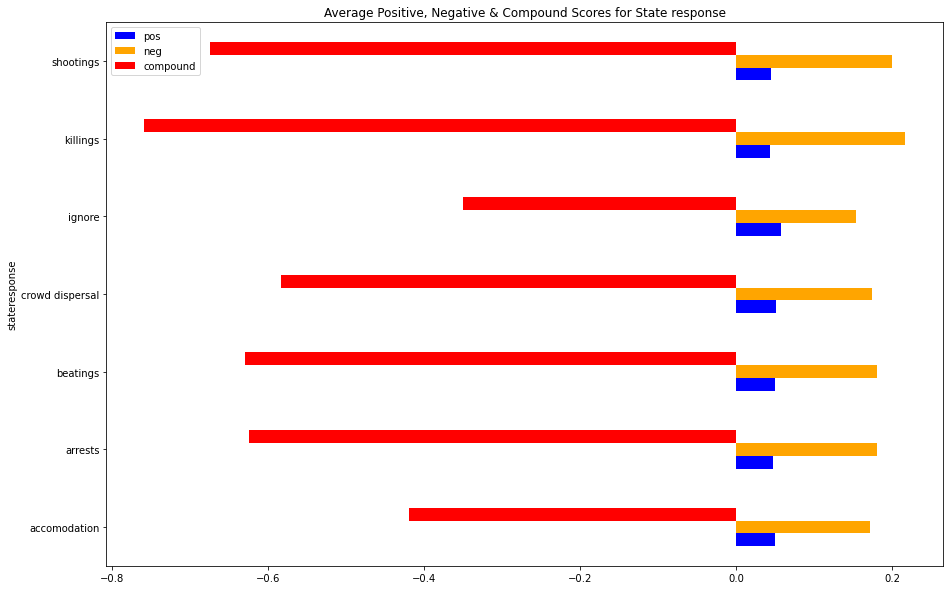

In [101]:
df_new.groupby('stateresponse').mean()[['pos', 'neg', 'compound']].plot(kind='barh',title='Average Positive, Negative & Compound Scores for State response',figsize=(15,10),color=(['blue','orange','red']))

In [54]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14474 entries, 0 to 14473
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   neg                14474 non-null  float64
 1   neu                14474 non-null  float64
 2   pos                14474 non-null  float64
 3   compound           14474 non-null  float64
 4   text               14474 non-null  object 
 5   protesterviolence  14474 non-null  float64
 6   stateresponse      14474 non-null  object 
dtypes: float64(5), object(2)
memory usage: 791.7+ KB


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14474 entries, 0 to 14473
Columns: 215 entries, protestnumber to region_South America
dtypes: float64(1), int64(212), object(2)
memory usage: 23.7+ MB


# Text Cleaning

In [56]:
import nltk
from nltk.stem import WordNetLemmatizer
import string

def tokenize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]
                                

In [57]:
tf_vectorizer = TfidfVectorizer(tokenizer=tokenize,
                                stop_words = 'english', 
                                lowercase = True,
                                ngram_range = (1,2),
                                max_df = 0.5, 
                                min_df = 10,
                                max_features=5000) 



In [58]:
df['notes'] = df['notes'].str.replace(r'(\b\w{1,2}\b)', '') # for words removing 1 or 2 letter words
 


In [59]:
#Combine dataframes here before splitting
combined_df = pd.concat([df, df_new], axis =1)


In [60]:
# Drop the original notes column
combined_df.drop(columns = ['notes'], inplace=True)

In [61]:
combined_df.shape

(14474, 221)

In [62]:
combined_df.head()

,protestnumber,protesterviolence,participants,stateresponse,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,...,region_North America,region_Oceania,region_South America,neg,neu,pos,compound,text,protesterviolence,stateresponse
0,1,0.0,3000,ignore,1,0,0,1,0,0,...,1,0,0,0.083,0.917,0.000,-0.8176,Canada s railway passenger system was finally...,0.0,ignore
1,2,0.0,1000,ignore,0,0,0,1,0,0,...,1,0,0,0.000,1.000,0.000,0.0000,protestors were only identified as young peop...,0.0,ignore
2,3,0.0,500,ignore,0,0,0,1,0,0,...,1,0,0,0.059,0.833,0.107,0.7003,"THE Queen, after calling on Canadians to rema...",0.0,ignore
3,4,1.0,300,accomodation,0,1,0,0,0,0,...,1,0,0,0.132,0.823,0.045,-0.9711,Canada s federal government has agreed to acq...,1.0,accomodation
4,5,1.0,950,arrests,0,0,0,1,0,0,...,1,0,0,0.226,0.677,0.098,-0.5267,Protests were directed against the state due t...,1.0,arrests


In [63]:
X=combined_df.drop(columns=['protesterviolence' , 'stateresponse'])
y=df_new['protesterviolence']

In [64]:
y.value_counts(normalize=True)

0.0    0.737046
1.0    0.262954
Name: protesterviolence, dtype: float64

In [65]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,stratify=y)


In [66]:
y_train.mean() , y_test.mean()

(0.26292031321971443, 0.26305609284332687)

# Applying TFiDF Vectorizer and to text

In [67]:
X_train_tf=tf_vectorizer.fit_transform(X_train['text'])
X_test_tf = tf_vectorizer.transform(X_test['text'])

/Users/sonalibhatia/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [68]:
tf_vectorizer.get_feature_names()[:200]

['000',
 '1',
 '1 thousand',
 '10',
 '10 2016',
 '100',
 '100 people',
 '100 protester',
 '1000',
 '1000 demonstrator',
 '1000 individual',
 '1000 people',
 '1000 protester',
 '1000 student',
 '10000',
 '10000 people',
 '100000',
 '100000 people',
 '11',
 '12',
 '12 2015',
 '120',
 '1200',
 '12000',
 '13',
 '13 square',
 '130',
 '13th',
 '14',
 '15',
 '150',
 '1500',
 '15000',
 '15000 people',
 '150000',
 '15th',
 '16',
 '16 year',
 '160',
 '17',
 '18',
 '180',
 '19',
 '1980',
 '1980s',
 '1989',
 '1990',
 '1991',
 '1992',
 '1994',
 '1995',
 '1996',
 '1st',
 '2',
 '2 12',
 '2 thousand',
 '20',
 '20 people',
 '20 year',
 '200',
 '200 demonstrator',
 '200 people',
 '200 protester',
 '2000',
 '2000 people',
 '2000 protester',
 '20000',
 '20000 people',
 '20000 supporter',
 '200000',
 '2003',
 '2003 time',
 '2008',
 '2009',
 '2010',
 '2011',
 '2011 ha',
 '2012',
 '2013',
 '2014',
 '2014 3',
 '2014 information',
 '2015',
 '2015 year',
 '2016',
 '2016 celebration',
 '2016 dresden',
 '2017',
 

In [69]:
df_X_train = pd.DataFrame(X_train_tf.todense(), columns=tf_vectorizer.get_feature_names())

df_X_test = pd.DataFrame(X_test_tf.todense(), columns = tf_vectorizer.get_feature_names())

In [70]:
df_X_train.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)

df_X_test.reset_index(drop=True, inplace = True)

X_test.reset_index(drop=True, inplace=True)

In [71]:
combined_X_train = pd.concat([df_X_train , X_train],axis=1)
combined_X_train.head()

,000,1,1 thousand,10,10 2016,100,100 people,100 protester,1000,1000 demonstrator,...,region_Europe,region_MENA,region_North America,region_Oceania,region_South America,neg,neu,pos,compound,text
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0.000,0.867,0.133,0.6705,While President Ter Petrosyan was absent on a ...
1,0.0,0.157694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0.103,0.897,0.000,-0.1280,Protest organizers estimated participation at ...
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.155,0.708,0.137,-0.2960,"In the Comoran capital Moroni, meanwhile, most..."
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.107,0.893,0.000,-0.7717,"In January, the island s independent media reg..."
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0.333,0.667,0.000,-0.1280,general strike and demonstrations


In [72]:
combined_X_test=pd.concat([df_X_test , X_test], axis=1)
combined_X_test.head()

,000,1,1 thousand,10,10 2016,100,100 people,100 protester,1000,1000 demonstrator,...,region_Europe,region_MENA,region_North America,region_Oceania,region_South America,neg,neu,pos,compound,text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,1,0,0,0,0,0.122,0.795,0.083,-0.6249,"In Italy rallies passed off peacefully, with ..."
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10918,0.0,...,0,0,0,0,0,0.213,0.697,0.090,-0.9260,Guatemala s government reached out for intern...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0,0,0,0,0,0.233,0.730,0.037,-0.9770,Women who said they were wives of missing mine...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0,0,0,0,0,0.016,0.881,0.103,0.8316,"KyrTAg reported on 9 October, quoting an offi..."
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0,0,0,0,0,0.220,0.587,0.193,-0.2732,Zambian journalists marched peacefully to prot...


In [73]:
combined_X_train.drop(columns = 'text', inplace=True)

combined_X_test.drop(columns = 'text', inplace = True)

In [74]:
combined_X_train.shape, combined_X_test.shape

((10855, 5216), (3619, 5216))

In [75]:
y_train.shape, y_test.shape

((10855,), (3619,))

# Modeling using Adaboost classifier

In [76]:
ada = AdaBoostClassifier(DecisionTreeClassifier())
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate':[.9, .1],
    'base_estimator__max_depth':[1,2,3]
}
gs = GridSearchCV(ada , param_grid=ada_params, cv=4)
gs.fit(combined_X_train , y_train)

print('GS Best score:',gs.best_score_)
gs.best_params_

GS Best score: 0.8460622535508907


{'base_estimator__max_depth': 1, 'learning_rate': 0.9, 'n_estimators': 100}

In [85]:
gs.score(combined_X_train,y_train) , gs.score(combined_X_test,y_test)

(0.869737448180562, 0.8386294556507322)

In [87]:
y_pred = gs.predict(combined_X_test)

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()

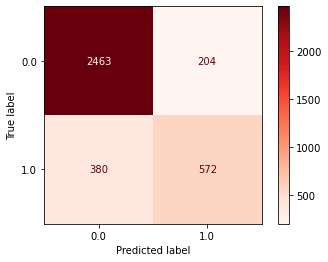

In [92]:
# View confusion matrix
disp=plot_confusion_matrix(gs, combined_X_test, y_test, cmap='Reds', values_format='d');

In [93]:
#Specificity :
tn/(tn+fp)

0.9235095613048369

In [94]:
#Sensitivity
tp / (tp+fn)

0.6008403361344538

In [95]:
#precision :
tp / (tp+fp)

0.7371134020618557

In [96]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.662037037037037

# Modeling using SVM 

In [105]:
ss = StandardScaler()
X_train_sc=ss.fit_transform(combined_X_train)
X_test_sc=ss.transform(combined_X_test)

In [108]:
# C values to GridSearch over
pgrid = {"C": np.linspace(0.0001, 1, 20)}

In [109]:
svc=LinearSVC()

cv_folds=StratifiedKFold(shuffle=True , random_state=42)


gs=GridSearchCV(svc , pgrid, cv=cv_folds , verbose=2, n_jobs=-1)

gs.fit(X_train_sc,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 77.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00])},
             verbose=2)

In [110]:
gs.score(X_train_sc,y_train) , gs.score(X_test_sc,y_test)

(0.9415016121602948, 0.8378004973749654)

In [111]:
gs.best_params_

{'C': 0.0001}

In [112]:
gs.best_score_

0.8382312298479964

In [113]:
y_pred = gs.predict(X_test_sc)

In [114]:
tn, fp, fn, tp = confusion_matrix(y_test , y_pred).ravel()

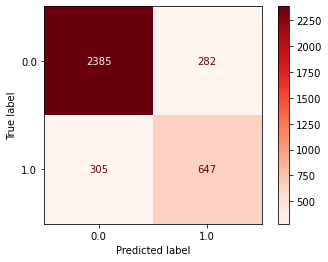

In [119]:
# View confusion matrix
disp=plot_confusion_matrix(gs, X_test_sc, y_test, cmap='Reds', values_format='d');

In [120]:
#Specificity :
tn/(tn+fp)

0.8942632170978627

In [121]:
#Sensitivity
tp / (tp+fn)

0.6796218487394958

In [122]:
#precision :
tp / (tp+fp)

0.6964477933261571

In [123]:
f1_score(y_test, y_pred)

0.687931951089846